# Group members:
1.   Loveth Omonegho Adams
2.   Aspita Toyin
3.   Edifonini Godwin Akpanudo
4.   Kumo Pascaline Myenneh
5.   Linea Kayavala
6.   Sizalokuhle Mpofu
7.   Okoh Oluchi Precious
8.   Omonode Oghenenyerhovwo Precious
9.   Winfred Githimbo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
retail = pd.read_csv ("/content/drive/MyDrive/online_retail_customer_churn - online_retail_customer_churn.csv")
retail

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


## 1. What is the shape of the dataset (rows and columns), and what does each column represent?


In [ ]:
print(retail.shape)
print(retail.columns)

(1000, 15)
Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')


## 2. Are there any missing values in the dataset? If yes, which columns are affected, and how many missing values do they have?

In [ ]:
missing=retail.isnull().sum()

if missing.sum() > 0:
    print("Yes, there are missing values.")
    print("Columns affected and their counts:")
    print(missing[missing > 0])
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


##  3. Check the data types of each column. Are any columns incorrectly typed (e.g., numeric stored as object)?

In [ ]:
print(retail.dtypes)

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object


## 4. Are there any duplicate customer records? If so, how many and how would you handle them?

In [ ]:
duplicates = retail.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")


Number of duplicate records: 0


## 5.  What are the mean, median, and standard deviation for Age, Annual_Income, and Total_Spend?What do these statistics tell you about the customers?

In [ ]:
retail[['Age', 'Annual_Income', 'Total_Spend']].agg(
    ['mean', 'median', 'std']
)

,Age,Annual_Income,Total_Spend
mean,43.267000,111.962960,5080.79265
median,43.000000,114.140000,4986.19500
std,15.242311,52.844111,2862.12335


**Interpretation of the statistics:**

**Mean** (average) → Gives the central tendency of the group.
Example: If the mean Age is 43, most customers are around their early-40s.
If the mean Annual_Income is high, it suggests a relatively affluent customer base.

**Median** (middle value) → Less sensitive to outliers than the mean.
If the median is lower than the mean for Annual_Income or Total_Spend, it indicates a few very high-income/spending customers are pulling the average upward.

**Standard Deviation** (spread) → Shows how varied the data is.
A low std dev for Age means most customers are close in age.
A high std dev for Annual_Income or Total_Spend means spending and income vary widely across customers.


## 6. Which customers fall into the highest and lowest 10% of Total_Spend? How do they differ from the rest?

In [ ]:

# Define thresholds for top and bottom 10%

high_threshold = retail['Total_Spend'].quantile(0.9)

low_threshold = retail['Total_Spend'].quantile(0.1)

# Segment customers

high_spenders = retail[retail['Total_Spend'] >= high_threshold]

low_spenders = retail[retail['Total_Spend'] <= low_threshold]

middle_spenders = retail[(retail['Total_Spend'] > low_threshold) & (retail['Total_Spend'] < high_threshold)]

print("Number of high spenders:", high_spenders.shape[0])

print("Number of low spenders:", low_spenders.shape[0])

# Compare key statistics

print("\nComparison of groups:")

comparison = pd.DataFrame({

    "High Spenders": high_spenders[['Age','Annual_Income','Total_Spend']].mean(),

    "Low Spenders": low_spenders[['Age','Annual_Income','Total_Spend']].mean(),

    "Middle Spenders": middle_spenders[['Age','Annual_Income','Total_Spend']].mean()

})

print(comparison)

Number of high spenders: 100
Number of low spenders: 100

Comparison of groups:
               High Spenders  Low Spenders  Middle Spenders
Age                  41.9100       45.2200        43.192500
Annual_Income       107.1590      108.7021       112.971063
Total_Spend        9552.0311      637.9662      5077.241150


## 7. How is customer satisfaction distributed? Plot it and describe any patterns you observe.

/tmp/ipython-input-1541503098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Satisfaction_Score', data=retail, palette='viridis')


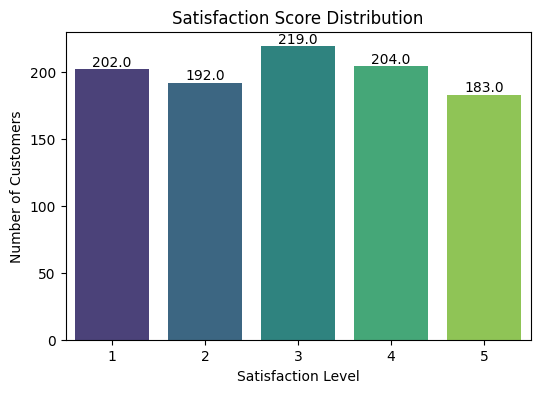

In [ ]:
# Plot customer satisfaction distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Satisfaction_Score', data=retail, palette='viridis')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),                # label text
        (p.get_x() + p.get_width() / 2., p.get_height()), # position
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title("Satisfaction Score Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Customers")
plt.show()


**Interpretation / Patterns:**
The countplot shows how many customers fall into each satisfaction level (e.g., 1–5 scale if that’s how it’s coded).

The percentage distribution helps you see proportions clearly.

Typical patterns you might observe:
If most customers cluster around high satisfaction (4–5) → strong positive experience.

If many are at low satisfaction (1–2) → potential service/product issues.

If the distribution is balanced or centered around 3 → mixed experiences, room for improvement.

From the above pattern distribution, most customers show mixed experiences, highlighting that there should be room for improvement.

## 8. How is the customer base distributed across Gender? Visualise the distribution.

Customer base distribution across Gender:

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64


/tmp/ipython-input-874756413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=retail, palette='pastel')


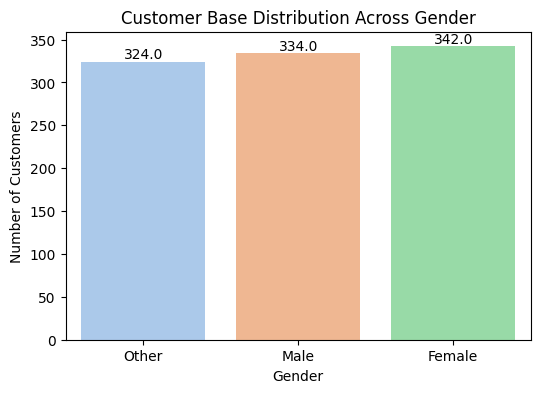


Percentage distribution across Gender:

Gender
Female    34.2
Male      33.4
Other     32.4
Name: proportion, dtype: float64


In [ ]:
# Gender distribution count
gender_counts = retail['Gender'].value_counts()
print("Customer base distribution across Gender:\n")
print(gender_counts)

# Plot distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=retail, palette='pastel')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title("Customer Base Distribution Across Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

# Optional: percentage distribution
gender_percent = retail['Gender'].value_counts(normalize=True) * 100
print("\nPercentage distribution across Gender:\n")
print(gender_percent)

## 9. Does churn (Target_Churn) vary by gender? Calculate churn rate per gender and visualize it.

Churn rate per gender:

Gender
Female    0.523392
Male      0.505988
Other     0.549383
Name: Target_Churn, dtype: float64


/tmp/ipython-input-3140405385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values, palette='Set2')


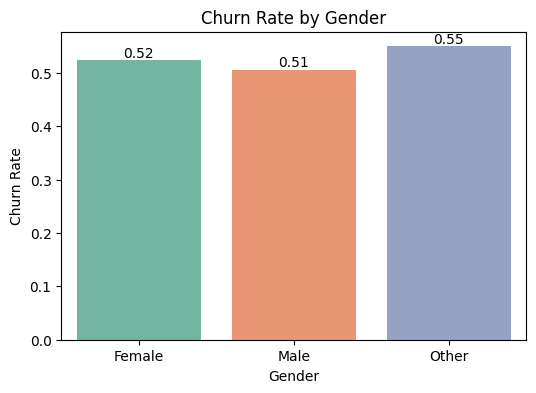

In [ ]:
# Calculate churn rate per gender
churn_rate_gender = retail.groupby('Gender')['Target_Churn'].mean()
print("Churn rate per gender:\n")
print(churn_rate_gender)

# Plot churn rate by gender
plt.figure(figsize=(6,4))
ax = sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values, palette='Set2')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",   # format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate")
plt.show()

## 10. How do customers respond to promotions (Promotion_Response), and which response type is most common?

Customer responses to promotions:

Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64

Most common response type: Unsubscribed


/tmp/ipython-input-2977162002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Promotion_Response', data=retail, palette='coolwarm')


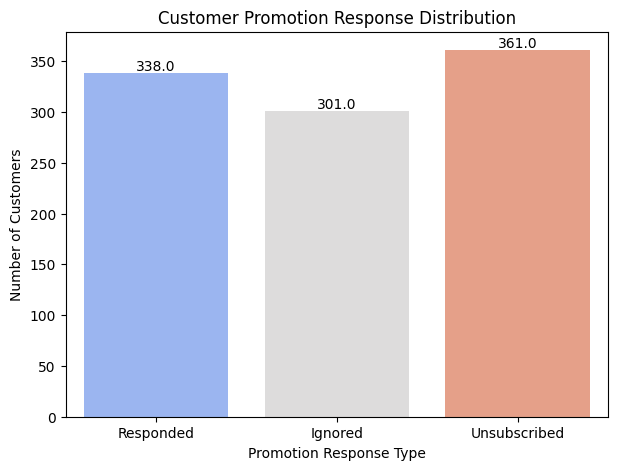

In [ ]:
# Count responses
promotion_counts = retail['Promotion_Response'].value_counts()
print("Customer responses to promotions:\n")
print(promotion_counts)

# Most common response
most_common = promotion_counts.idxmax()
print(f"\nMost common response type: {most_common}")

# Plot distribution
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Promotion_Response', data=retail, palette='coolwarm')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title("Customer Promotion Response Distribution")
plt.xlabel("Promotion Response Type")
plt.ylabel("Number of Customers")
plt.show()

## 11. What is the relationship between Years_as_Customer and Total_Spend? Create a scatter plot and describe the trend.

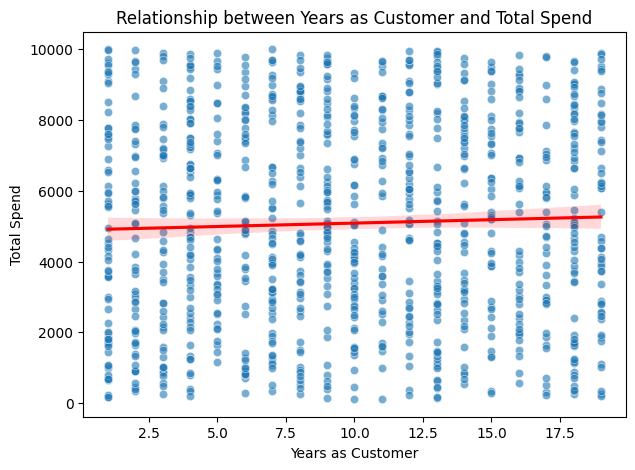

In [ ]:


# Scatter plot: Years_as_Customer vs Total_Spend

plt.figure(figsize=(7,5))

sns.scatterplot(x='Years_as_Customer', y='Total_Spend', data=retail, alpha=0.6)

# Add regression line to show trend

sns.regplot(x='Years_as_Customer', y='Total_Spend', data=retail, scatter=False, color='red')

plt.title("Relationship between Years as Customer and Total Spend")

plt.xlabel("Years as Customer")

plt.ylabel("Total Spend")

plt.show()



**Description**

**Axes:**

X-axis = Years as Customer (roughly 1 to 19 years).

Y-axis = Total Spend (from near 0 up to about 10,000).

**Data pattern:**
The points are widely scattered at every customer tenure level. For almost any number of years, total spend ranges from very low to very high. That means tenure alone explains very little about how much a customer spends.

**Trend line** (red):
There’s a slight upward slope, indicating a weak positive relationship: customers who’ve been around longer tend to spend a bit more. But the slope is shallow—this is not a strong or predictive relationship.

**Key takeaway:**
Longevity ≠ loyalty in monetary terms. Being a customer for 15–20 years does not reliably mean higher spending than someone who’s been around for 2–5 years.

## 12.  Do customers with higher Num_of_Purchases generally have higher Total_Spend? Quantify and visualise this relationship.

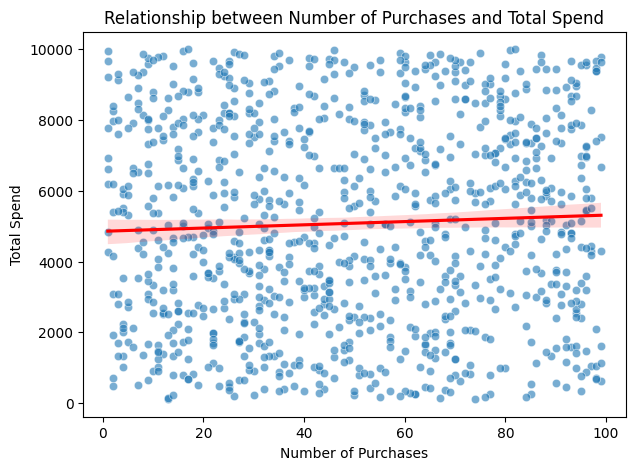

Correlation between Num_of_Purchases and Total_Spend: 0.05


In [ ]:


# Scatter plot with regression line

plt.figure(figsize=(7,5))

sns.scatterplot(x='Num_of_Purchases', y='Total_Spend', data=retail, alpha=0.6)

sns.regplot(x='Num_of_Purchases', y='Total_Spend', data=retail, scatter=False, color='red')

plt.title("Relationship between Number of Purchases and Total Spend")

plt.xlabel("Number of Purchases")

plt.ylabel("Total Spend")

plt.show()

# Quantify correlation

correlation = retail['Num_of_Purchases'].corr(retail['Total_Spend'])

print(f"Correlation between Num_of_Purchases and Total_Spend: {correlation:.2f}")



## 13.  How does Email_Opt_In status relate to churn? Compare churn rates between opt-in and non–opt-in customers.

Churn rate by Email Opt-In status:

Email_Opt_In
False    0.526539
True     0.525520
Name: Target_Churn, dtype: float64


/tmp/ipython-input-4061013162.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_optin.index, y=churn_by_optin.values, palette='Set1')


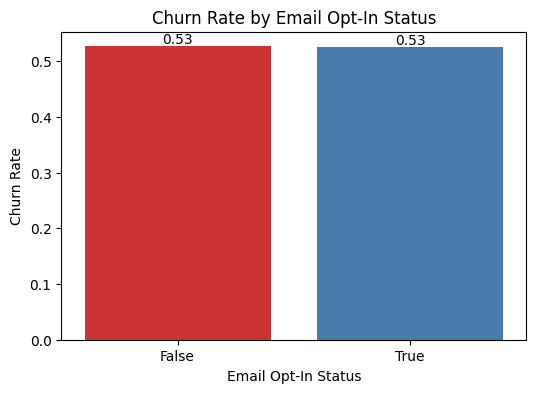

In [ ]:


# Calculate churn rate by Email_Opt_In status

churn_by_optin = retail.groupby('Email_Opt_In')['Target_Churn'].mean()

print("Churn rate by Email Opt-In status:\n")

print(churn_by_optin)

# Plot churn rate comparison

plt.figure(figsize=(6,4))

ax = sns.barplot(x=churn_by_optin.index, y=churn_by_optin.values, palette='Set1')

# Add data labels on each bar

for p in ax.patches:

    ax.annotate(

        f"{p.get_height():.2f}",   # format to 2 decimal places

        (p.get_x() + p.get_width() / 2., p.get_height()),

        ha='center', va='bottom', fontsize=10, color='black'

    )

plt.title("Churn Rate by Email Opt-In Status")

plt.xlabel("Email Opt-In Status")

plt.ylabel("Churn Rate")

plt.show()

